In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
import spectral.contrast as sc

In [3]:
def load_mat(datafile):
    dfile = h5py.File(datafile, 'r')
    data = np.squeeze(np.array(dfile['data']))
    data = np.swapaxes(data, 0, -1)
    y = np.squeeze(np.array(dfile['y']))
    dfile.close()
    dfile.close()
    return data, y


In [4]:
cd ../../spectral

/mnt/c/Users/azaidi.000/development/neural_data/spectral


In [5]:
%time data, y = load_mat("data/sleep/RC_051_sleep.mat")

CPU times: user 2.64 s, sys: 1.25 s, total: 3.89 s
Wall time: 3.96 s


In [6]:
data_d = sc.decimate(data, 10, axis=1)

# Using SVD for channel decomposition

In [7]:
data_d.shape

(129, 1500, 60)

In [8]:
d_sub = data_d[:,:,0]

In [39]:
from scipy.stats import zscore

In [10]:
idx = np.std(d_sub, axis=1)==0.

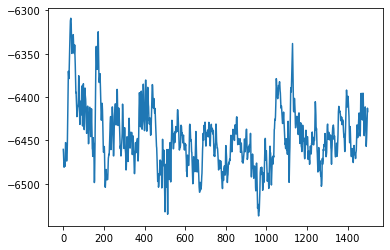

In [51]:
plt.plot(np.mean(d_sub, axis=0))

In [52]:
u,s,vh = np.linalg.svd(d_sub.T, full_matrices=False)

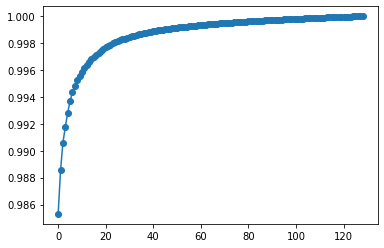

In [53]:
plt.plot(np.cumsum(s)/np.sum(s), "o-")

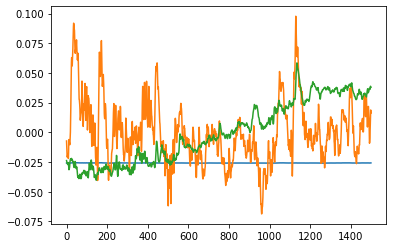

In [54]:
plt.plot(u[:,:3])

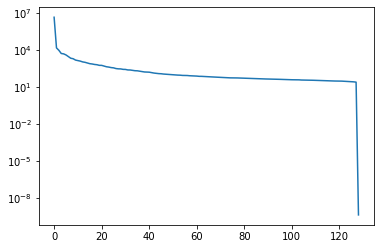

In [66]:
plt.semilogy(s)

In [16]:
from scipy.signal import stft

In [17]:
f, t, data_stft = stft(u[:,0], nperseg=100, noverlap=90, fs=100)

In [18]:
t= t[5:-5]
data_stft = np.abs(data_stft[:,5:-5])
data_stft[:1,:] = 0

In [19]:
data_stft.shape

(51, 141)

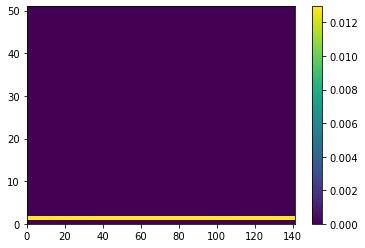

In [20]:
plt.pcolormesh(data_stft)
plt.colorbar()

In [21]:
from sklearn.preprocessing import normalize

In [22]:
data_norm = normalize(data_stft, norm='l1', axis=0)

<ipython-input-23-424159198a9e>:1: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(t, f, np.log(data_norm))


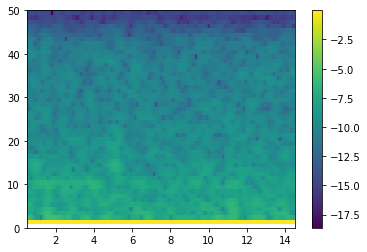

In [23]:
plt.pcolormesh(t, f, np.log(data_norm))
plt.colorbar()

In [24]:
np.sum(data_norm, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [25]:
p_mean = np.mean(data_norm, axis=1)

In [26]:
data_sub = data_norm.T - p_mean

<ipython-input-27-77b274ed98f0>:1: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(np.log(data_norm)); plt.colorbar()


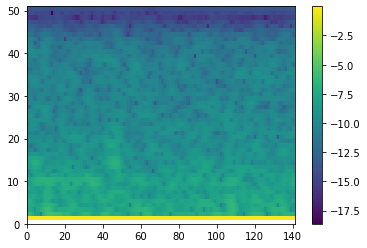

In [27]:
plt.pcolormesh(np.log(data_norm)); plt.colorbar()

In [28]:
u1, s1, vh1 = np.linalg.svd(data_norm, full_matrices=False)

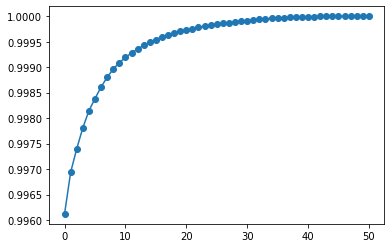

In [29]:
plt.plot(np.cumsum(s1)/np.sum(s1), 'o-')

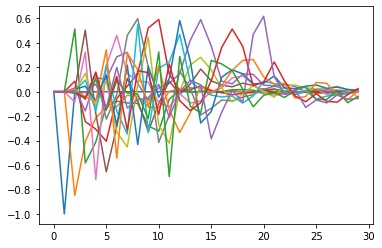

In [30]:
plt.plot(u1[:30,:15])

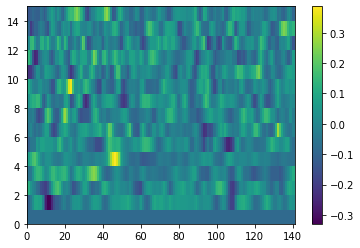

In [31]:
plt.pcolormesh(vh1[:15,:]); plt.colorbar()

In [32]:
u2,s2,vh2 = np.linalg.svd(vh1.T, full_matrices=False)

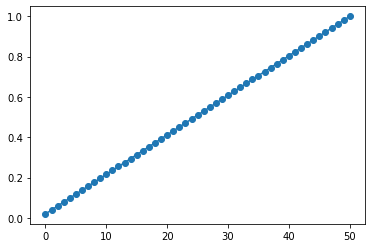

In [33]:
plt.plot(np.cumsum(s2)/np.sum(s2), 'o-')

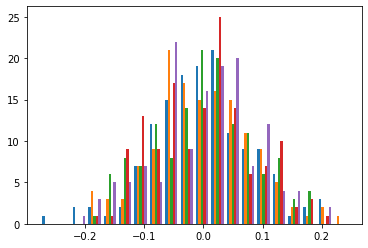

In [34]:
plt.hist(u2[:,:5], 20);

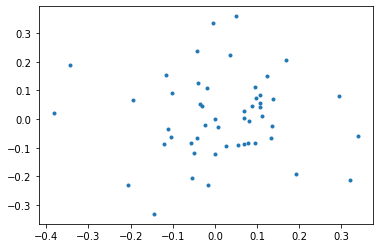

In [50]:
plt.plot(vh2[1,:], vh2[2,:], '.')